In [4]:
# We need to create a SQLite database
# I'm going to use a API, but you can use CSVs

# Load data into a PANDAS dataframe -> load into the database

#### Load Dependencies

In [5]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import scipy.stats as stats

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

#### Read in Data File

In [6]:
# Create a file path
filepath = "../Resources/scrubbed.csv"

# Read in the data. 
df = pd.read_csv(filepath)

df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6680\3153306518.py:5: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


#### Data Cleaning

In [7]:
df = df.dropna(subset=['country', 'state'])

In [8]:
# Fill nulls with 'unknown'
df["shape"] = df["shape"].fillna('unknown')
df["comments"] = df["comments"].fillna('no comment')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68121 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              68121 non-null  object 
 1   city                  68121 non-null  object 
 2   state                 68121 non-null  object 
 3   country               68121 non-null  object 
 4   shape                 68121 non-null  object 
 5   duration (seconds)    68121 non-null  object 
 6   duration (hours/min)  68121 non-null  object 
 7   comments              68121 non-null  object 
 8   date posted           68121 non-null  object 
 9   latitude              68121 non-null  object 
 10  longitude             68121 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.2+ MB


In [9]:
# Create a pared down list of shapes
item_shape = ['hexagon', 'delta', 'round', 'crescent', 'pyramid', 'flare', 'dome', 'changed', 'cross', 'cone']
df = df[~df["shape"].isin(item_shape)]

In [10]:
df = df[df["country"] == 'us']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64666 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              64666 non-null  object 
 1   city                  64666 non-null  object 
 2   state                 64666 non-null  object 
 3   country               64666 non-null  object 
 4   shape                 64666 non-null  object 
 5   duration (seconds)    64666 non-null  object 
 6   duration (hours/min)  64666 non-null  object 
 7   comments              64666 non-null  object 
 8   date posted           64666 non-null  object 
 9   latitude              64666 non-null  object 
 10  longitude             64666 non-null  float64
dtypes: float64(1), object(10)
memory usage: 5.9+ MB


In [11]:
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64666 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              64183 non-null  datetime64[ns]
 1   city                  64666 non-null  object        
 2   state                 64666 non-null  object        
 3   country               64666 non-null  object        
 4   shape                 64666 non-null  object        
 5   duration (seconds)    64666 non-null  object        
 6   duration (hours/min)  64666 non-null  object        
 7   comments              64666 non-null  object        
 8   date posted           64666 non-null  object        
 9   latitude              64666 non-null  object        
 10  longitude             64666 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 5.9+ MB


In [12]:
df = df.dropna(subset=['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64183 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              64183 non-null  datetime64[ns]
 1   city                  64183 non-null  object        
 2   state                 64183 non-null  object        
 3   country               64183 non-null  object        
 4   shape                 64183 non-null  object        
 5   duration (seconds)    64183 non-null  object        
 6   duration (hours/min)  64183 non-null  object        
 7   comments              64183 non-null  object        
 8   date posted           64183 non-null  object        
 9   latitude              64183 non-null  object        
 10  longitude             64183 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 5.9+ MB


In [13]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64183 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              64183 non-null  datetime64[ns]
 1   city                  64183 non-null  object        
 2   state                 64183 non-null  object        
 3   country               64183 non-null  object        
 4   shape                 64183 non-null  object        
 5   duration (seconds)    64183 non-null  object        
 6   duration (hours/min)  64183 non-null  object        
 7   comments              64183 non-null  object        
 8   date posted           64183 non-null  object        
 9   latitude              64183 non-null  float64       
 10  longitude             64183 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 5.9+ MB


In [14]:
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64183 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              64183 non-null  datetime64[ns]
 1   city                  64183 non-null  object        
 2   state                 64183 non-null  object        
 3   country               64183 non-null  object        
 4   shape                 64183 non-null  object        
 5   duration (seconds)    64181 non-null  float64       
 6   duration (hours/min)  64183 non-null  object        
 7   comments              64183 non-null  object        
 8   date posted           64183 non-null  object        
 9   latitude              64183 non-null  float64       
 10  longitude             64183 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 5.9+ MB


In [15]:
df = df.dropna(subset=['duration (seconds)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64181 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              64181 non-null  datetime64[ns]
 1   city                  64181 non-null  object        
 2   state                 64181 non-null  object        
 3   country               64181 non-null  object        
 4   shape                 64181 non-null  object        
 5   duration (seconds)    64181 non-null  float64       
 6   duration (hours/min)  64181 non-null  object        
 7   comments              64181 non-null  object        
 8   date posted           64181 non-null  object        
 9   latitude              64181 non-null  float64       
 10  longitude             64181 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 5.9+ MB


In [16]:
df = df[df['datetime'].dt.year >= 1994]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58560 entries, 59 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              58560 non-null  datetime64[ns]
 1   city                  58560 non-null  object        
 2   state                 58560 non-null  object        
 3   country               58560 non-null  object        
 4   shape                 58560 non-null  object        
 5   duration (seconds)    58560 non-null  float64       
 6   duration (hours/min)  58560 non-null  object        
 7   comments              58560 non-null  object        
 8   date posted           58560 non-null  object        
 9   latitude              58560 non-null  float64       
 10  longitude             58560 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 5.4+ MB


In [17]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
59,1994-10-10 18:30:00,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556
60,1994-10-10 22:00:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222
62,1995-10-10 19:45:00,milwaukee,wi,us,unknown,120.0,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389
63,1995-10-10 22:40:00,oakland,ca,us,unknown,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722
64,1996-10-10 03:20:00,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944


In [18]:
df["hour"] = df.datetime.dt.hour
df["month"] = df.datetime.dt.month
df["year"] = df.datetime.dt.year
df["day_of_week"] = df.datetime.dt.dayofweek
df["dayofweek"] = df.datetime.dt.strftime('%A')

In [19]:
conditions = [
    (df['shape'].isin(['light', 'fireball', 'flash'])),
    (df['shape'] == 'formation'),
    (df['shape'].isin(['cylinder', 'rectangle', 'cigar'])),
    (df['shape'].isin(['teardrop', 'egg', 'oval'])),
    (df['shape'].isin(['chevron', 'diamond', 'triangle'])),
    (df['shape'].isin(['changing', 'unknown', 'other'])),
    (df['shape'].isin(['disk', 'sphere', 'circle'])),
    (df['shape'].notnull())
]
choices = ['bright light', 'formation', 'cylindrical', 'oval', 'triangular', 'other', 'circular', 'tbd']
df['shape_category'] = np.select(conditions, choices, default='tbd')
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,hour,month,year,day_of_week,dayofweek,shape_category
59,1994-10-10 18:30:00,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,18,10,1994,0,Monday,cylindrical
60,1994-10-10 22:00:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,22,10,1994,0,Monday,bright light
62,1995-10-10 19:45:00,milwaukee,wi,us,unknown,120.0,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389,19,10,1995,1,Tuesday,other
63,1995-10-10 22:40:00,oakland,ca,us,unknown,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722,22,10,1995,1,Tuesday,other
64,1996-10-10 03:20:00,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,3,10,1996,3,Thursday,triangular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,21,9,2013,0,Monday,bright light
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,22,9,2013,0,Monday,circular
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,22,9,2013,0,Monday,other
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,22,9,2013,0,Monday,circular


In [20]:
df['num_shapes'] = df['shape'].map(df['shape'].value_counts())
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,hour,month,year,day_of_week,dayofweek,shape_category,num_shapes
59,1994-10-10 18:30:00,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,18,10,1994,0,Monday,cylindrical,931
60,1994-10-10 22:00:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,22,10,1994,0,Monday,bright light,12751
62,1995-10-10 19:45:00,milwaukee,wi,us,unknown,120.0,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389,19,10,1995,1,Tuesday,other,5591
63,1995-10-10 22:40:00,oakland,ca,us,unknown,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722,22,10,1995,1,Tuesday,other,5591
64,1996-10-10 03:20:00,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,3,10,1996,3,Thursday,triangular,5947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,21,9,2013,0,Monday,bright light,12751
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,22,9,2013,0,Monday,circular,5587
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,22,9,2013,0,Monday,other,3970
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,22,9,2013,0,Monday,circular,5587


In [21]:
df = df.rename(columns={"duration (seconds)": "duration_seconds", "duration (hours/min)": "duration_hours_min", "date posted": "date_posted"})
df.head()

,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date_posted,latitude,longitude,hour,month,year,day_of_week,dayofweek,shape_category,num_shapes
59,1994-10-10 18:30:00,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,18,10,1994,0,Monday,cylindrical,931
60,1994-10-10 22:00:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,22,10,1994,0,Monday,bright light,12751
62,1995-10-10 19:45:00,milwaukee,wi,us,unknown,120.0,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389,19,10,1995,1,Tuesday,other,5591
63,1995-10-10 22:40:00,oakland,ca,us,unknown,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722,22,10,1995,1,Tuesday,other,5591
64,1996-10-10 03:20:00,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,3,10,1996,3,Thursday,triangular,5947


In [22]:
df.dayofweek.value_counts()

dayofweek
Saturday     10419
Sunday        8476
Friday        8473
Wednesday     8053
Thursday      8015
Tuesday       7849
Monday        7275
Name: count, dtype: int64

In [23]:
df.hour.value_counts()

hour
21    8828
22    8078
20    6545
23    5613
19    4636
18    2999
0     2891
1     2258
17    1901
2     1579
3     1390
5     1278
4     1146
16    1132
15     979
6      943
12     911
14     873
13     868
10     868
11     831
9      742
7      668
8      603
Name: count, dtype: int64

In [24]:
def categorize_shape(shape):
    if shape in ['changing', 'other', 'unknown']:
        return 'Other'
    elif shape in ['chevron', 'diamond', 'triangle']:
        return 'Angular'
    elif shape in ['cigar', 'cylinder', 'rectangle']:
        return 'Rectangular'
    elif shape in ['circle', 'disk', 'sphere']:
        return 'Circular'
    elif shape in ['fireball', 'flash', 'light']:
        return 'Luminous'
    elif shape in ['egg', 'oval', 'teardrop']:
        return 'Elliptical'
    elif shape == 'formation':
        return 'Formation'
    else:
        return 'Uncategorized'
# Apply category based on shape function
df['category'] = df['shape'].apply(categorize_shape)
df.head()

,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date_posted,latitude,longitude,hour,month,year,day_of_week,dayofweek,shape_category,num_shapes,category
59,1994-10-10 18:30:00,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,18,10,1994,0,Monday,cylindrical,931,Rectangular
60,1994-10-10 22:00:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,22,10,1994,0,Monday,bright light,12751,Luminous
62,1995-10-10 19:45:00,milwaukee,wi,us,unknown,120.0,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389,19,10,1995,1,Tuesday,other,5591,Other
63,1995-10-10 22:40:00,oakland,ca,us,unknown,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722,22,10,1995,1,Tuesday,other,5591,Other
64,1996-10-10 03:20:00,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,3,10,1996,3,Thursday,triangular,5947,Angular


In [25]:
df.to_csv('ufo.csv', index=False)

In [69]:
result = df.loc[df.groupby('state')['shape'].idxmax()][['state', 'shape']]
result

,state,shape
3620,ak,unknown
3778,al,unknown
1110,ar,unknown
205,az,unknown
63,ca,unknown
344,co,unknown
436,ct,unknown
62443,dc,sphere
5302,de,unknown
176,fl,unknown


In [78]:
most_common_shapes = df.groupby('state')['shape'].agg(lambda x: x.value_counts().idxmax())
most_common_shapes

state
ak       light
al       light
ar       light
az       light
ca       light
co       light
ct       light
dc    cylinder
de    triangle
fl       light
ga       light
hi       light
ia       light
id       light
il       light
in       light
ks       light
ky       light
la       light
ma       light
md       light
me       light
mi       light
mn       light
mo       light
ms       light
mt       light
nc       light
nd    triangle
ne       light
nh       light
nj       light
nm       light
nv       light
ny       light
oh       light
ok       light
or       light
pa       light
pr        disk
ri       light
sc       light
sd       light
tn       light
tx       light
ut       light
va       light
vt       light
wa       light
wi       light
wv       light
wy       light
Name: shape, dtype: object

In [88]:
filtered_data = df[(df['shape'] != 'light') & (df['shape'] != 'unknown')]
most_common_shapes_filtered = filtered_data.groupby('state')['shape'].agg(lambda x: x.value_counts().idxmax())
most_common_shapes_filtered

state
ak    triangle
al    triangle
ar    triangle
az    triangle
ca      circle
co    triangle
ct    fireball
dc    cylinder
de    triangle
fl    fireball
ga      circle
hi      circle
ia    triangle
id    triangle
il    triangle
in    triangle
ks    triangle
ky    triangle
la    triangle
ma    triangle
md    triangle
me      circle
mi    triangle
mn    triangle
mo    triangle
ms    triangle
mt    fireball
nc      circle
nd    triangle
ne      circle
nh      circle
nj      circle
nm      circle
nv      circle
ny      circle
oh    triangle
ok    triangle
or      circle
pa      circle
pr        disk
ri      circle
sc      circle
sd    triangle
tn    triangle
tx    triangle
ut    triangle
va    triangle
vt    fireball
wa    fireball
wi    fireball
wv    triangle
wy    triangle
Name: shape, dtype: object

In [80]:
most_common_shapes_filtered.to_csv('most_common_shapes.csv', index=False)

In [76]:
ak_data = df[df['state'] == 'ny']

# Perform value count on the 'shape' column for the state of Alaska
shape_value_counts = ak_data['shape'].value_counts()
shape_value_counts

shape
light        534
circle       278
triangle     247
fireball     221
unknown      219
other        174
sphere       152
disk         137
oval         134
formation     76
changing      62
cigar         60
flash         52
diamond       44
rectangle     40
cylinder      36
egg           31
teardrop      31
chevron       28
Name: count, dtype: int64

In [60]:
df["shape"].value_counts()

shape
light        12751
triangle      5947
unknown       5591
circle        5587
fireball      4970
other         3970
sphere        3930
disk          2921
oval          2637
formation     1874
changing      1496
cigar         1327
flash         1033
rectangle      931
cylinder       915
diamond        854
chevron        739
teardrop       565
egg            522
Name: count, dtype: int64

In [68]:
shape_counts = df["shape"].value_counts()

percentage_shape = (shape_counts["circle"] / shape_counts.sum()) * 100
percentage_shape

9.540642076502733

In [61]:
df["category"].value_counts()

category
Luminous       18754
Circular       12438
Other          11057
Angular         7540
Elliptical      3724
Rectangular     3173
Formation       1874
Name: count, dtype: int64

In [64]:
category_counts = df["category"].value_counts()

percentage_category = (category_counts["Circular"] / category_counts.sum()) * 100
percentage_category

21.239754098360656

In [53]:
df["month"].value_counts()

month
7     6605
8     6034
9     5656
10    5640
11    5306
6     4900
12    4348
1     4325
3     4190
4     4136
5     3808
2     3612
Name: count, dtype: int64

In [59]:
month_counts = df["month"].value_counts()

percentage_month = (month_counts[6] / month_counts.sum()) * 100
percentage_month

8.367486338797814

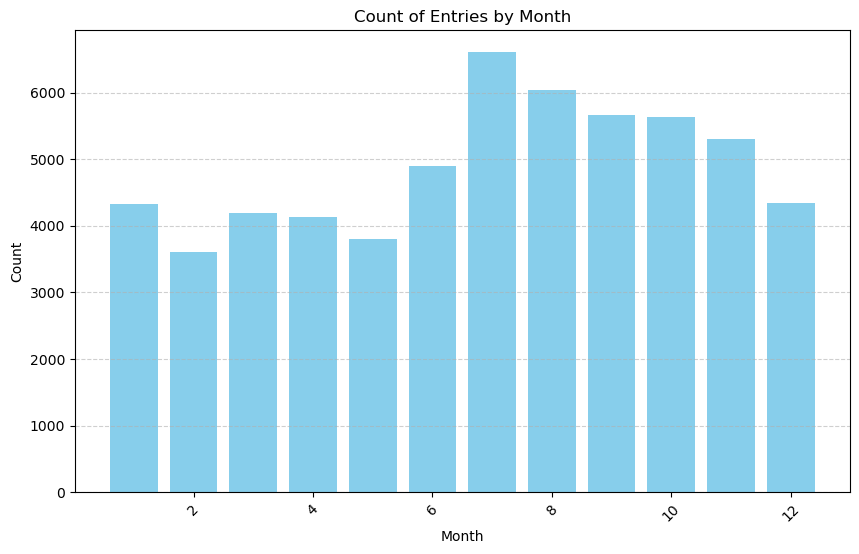

In [54]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'month' column
month_counts = df["month"].value_counts().sort_index()

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(month_counts.index, month_counts.values, color='skyblue')  # Create the bar chart
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Count of Entries by Month')  # Set the title
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better visualization
plt.show()

In [30]:
df["state"].value_counts()

state
ca    8081
wa    3698
fl    3540
tx    3032
ny    2556
az    2280
il    2273
pa    2105
oh    1994
mi    1623
or    1616
nc    1574
co    1307
mo    1304
in    1157
va    1145
ga    1129
wi    1113
nj    1098
ma    1097
tn    1023
sc     931
mn     909
ct     768
md     751
nv     748
ky     739
nm     637
ok     633
ia     609
ut     572
al     560
ks     540
ar     512
me     485
id     481
la     481
nh     436
mt     430
wv     397
ne     335
ms     308
ak     273
vt     240
hi     233
ri     204
sd     165
wy     158
de     146
nd     112
pr      15
dc       7
Name: count, dtype: int64

In [50]:
df["hour"].value_counts()

hour
21    8828
22    8078
20    6545
23    5613
19    4636
18    2999
0     2891
1     2258
17    1901
2     1579
3     1390
5     1278
4     1146
16    1132
15     979
6      943
12     911
14     873
13     868
10     868
11     831
9      742
7      668
8      603
Name: count, dtype: int64

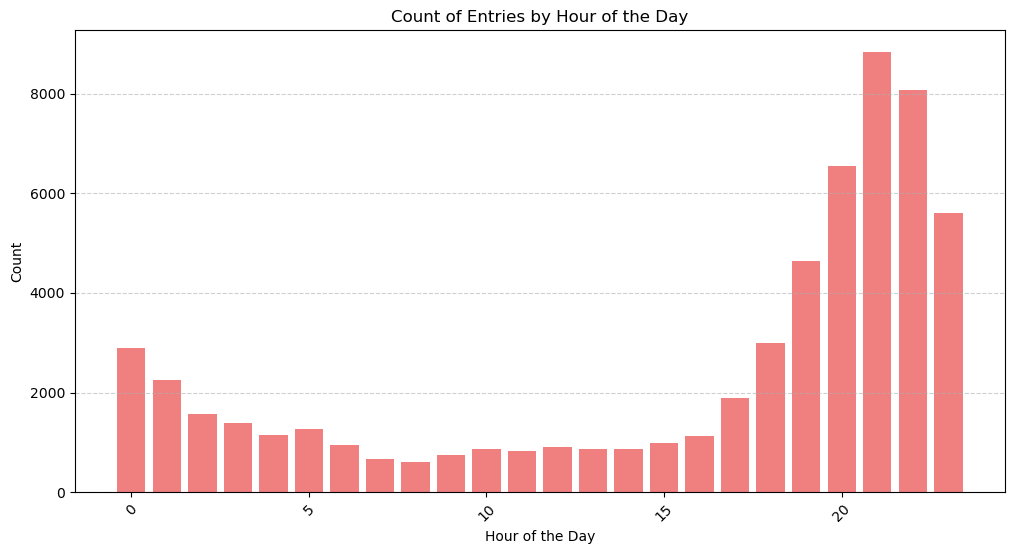

In [51]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'hour' column
hour_counts = df["hour"].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(hour_counts.index, hour_counts.values, color='lightcoral')  # Create the bar chart
plt.xlabel('Hour of the Day')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Count of Entries by Hour of the Day')  # Set the title
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better visualization
plt.show()

In [44]:
state_counts = df["state"].value_counts()

percentage_ca = (state_counts['ca'] / state_counts.sum()) * 100
percentage_ca

13.799521857923496

In [33]:
df["year"].value_counts()

year
2012    6240
2013    5975
2011    4327
2008    3964
2009    3617
2010    3501
2007    3433
2004    3198
2005    3178
2003    2921
2006    2839
2001    2417
2002    2404
1999    2234
2000    2155
2014    1946
1998    1371
1997     990
1995     895
1996     634
1994     321
Name: count, dtype: int64

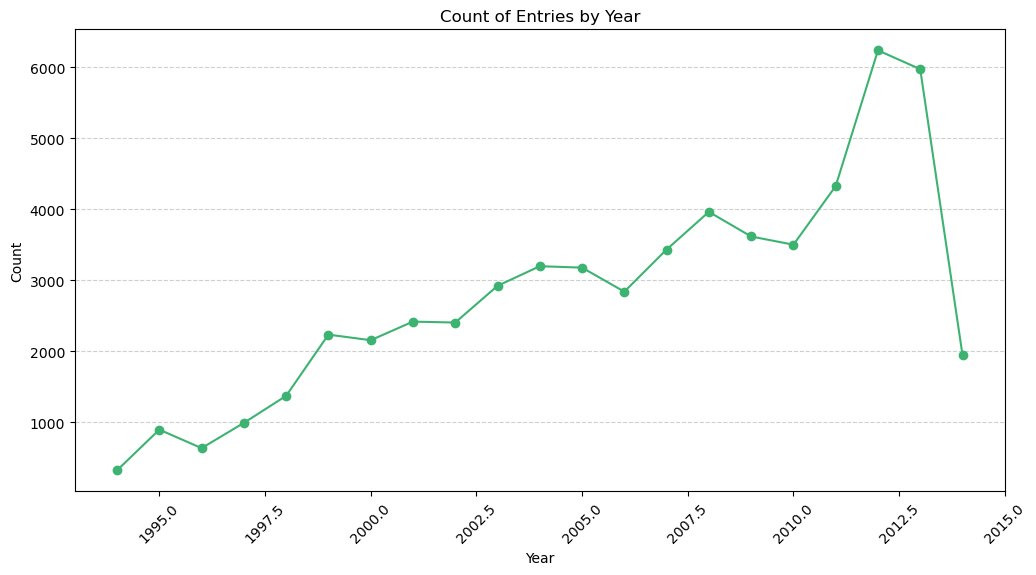

In [52]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'year' column
year_counts = df["year"].value_counts().sort_index()

# Create a line graph using Matplotlib
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(year_counts.index, year_counts.values, marker='o', color='mediumseagreen', linestyle='-')  # Create the line plot
plt.xlabel('Year')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Count of Entries by Year')  # Set the title
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better visualization
plt.show()

In [42]:
df_2012 = df[df['year'] == 2012]

# Perform value_counts() on the 'state' column within the year 2012
state_counts_2012 = df_2012['state'].value_counts()
state_counts_2012

state
ca    633
fl    376
wa    360
ny    330
pa    257
il    248
oh    233
tx    222
nc    211
mi    192
az    176
sc    162
or    152
mo    148
wi    139
ct    136
ma    129
mn    124
nj    123
va    122
in    118
tn    111
ga    109
co    101
md     94
ok     84
me     83
ia     79
ut     78
nv     71
nh     69
mt     67
nm     59
wv     58
ky     55
ar     51
al     50
vt     49
id     49
ks     47
ne     41
ak     40
la     37
ri     35
ms     34
de     27
sd     24
hi     23
wy     11
nd      9
dc      4
Name: count, dtype: int64

In [43]:
state_counts_2012 = df["state"].value_counts()

percentage_ca = (state_counts['ca'] / state_counts.sum()) * 100
percentage_ca

13.799521857923496

In [34]:
# Assuming you have a Series with the counts of each year
year_counts = df["year"].value_counts()

# Sort the counts by the year in ascending order
sorted_year_counts = year_counts.sort_index()

print(sorted_year_counts)

year
1994     321
1995     895
1996     634
1997     990
1998    1371
1999    2234
2000    2155
2001    2417
2002    2404
2003    2921
2004    3198
2005    3178
2006    2839
2007    3433
2008    3964
2009    3617
2010    3501
2011    4327
2012    6240
2013    5975
2014    1946
Name: count, dtype: int64


In [46]:
df["dayofweek"].value_counts()

dayofweek
Saturday     10419
Sunday        8476
Friday        8473
Wednesday     8053
Thursday      8015
Tuesday       7849
Monday        7275
Name: count, dtype: int64

In [49]:
weekday_counts = df["dayofweek"].value_counts()

percentage_saturday = (weekday_counts['Monday'] / weekday_counts.sum()) * 100
percentage_saturday

12.423155737704917

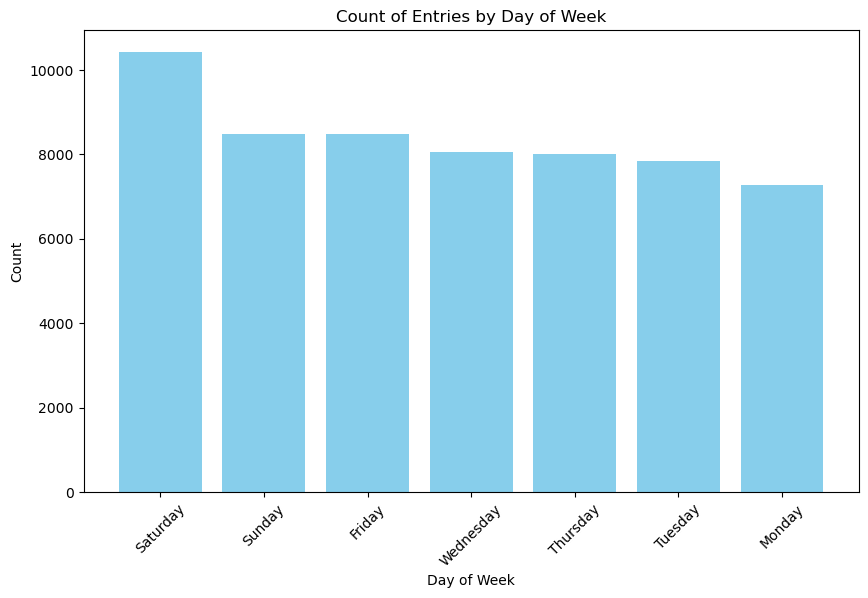

In [47]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'dayofweek' column
dayofweek_counts = df["dayofweek"].value_counts()

# Create a bar graph using Matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(dayofweek_counts.index, dayofweek_counts.values, color='skyblue')  # Create the bar plot
plt.xlabel('Day of Week')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Count of Entries by Day of Week')  # Set the title
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [31]:
# Assuming you have a DataFrame df with columns "state" and "year"

# Filter the DataFrame by a specific year, for example, 2019
filtered_df = df[df["year"] == 2019]

# Now you can apply value_counts on the filtered DataFrame to get the counts for each state in 2019
state_counts_2019 = filtered_df["state"].value_counts()

print(state_counts_2019)

Series([], Name: count, dtype: int64)


#### Below is the remaining starter code

In [26]:
# Create engine using the `ufo.sqlite` database file
engine = create_engine("sqlite:///ufo.sqlite")

In [27]:
# write to the database
df.to_sql("ufo", con=engine, index=False, method=None, if_exists="replace")

58560

In [28]:
# INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

ufo
-----------
datetime DATETIME
city TEXT
state TEXT
country TEXT
shape TEXT
duration_seconds FLOAT
duration_hours_min TEXT
comments TEXT
date_posted TEXT
latitude FLOAT
longitude FLOAT
hour INTEGER
month INTEGER
year INTEGER
day_of_week INTEGER
dayofweek TEXT
shape_category TEXT
num_shapes BIGINT
category TEXT



In [29]:
# close the engine
engine.dispose()